## EX1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

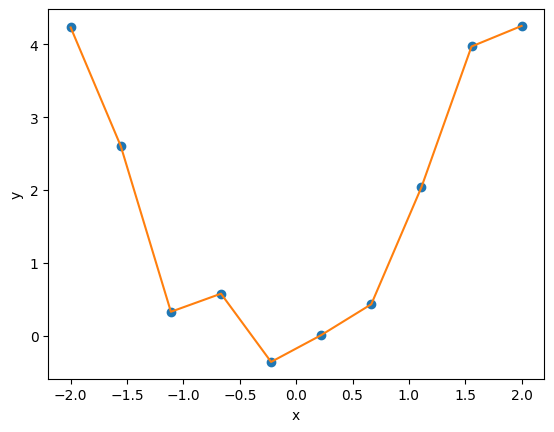

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tạo bộ dữ liệu 10 điểm
x = np.linspace(-2, 2, 10)
y = x**2 + np.random.normal(0, 0.5, 10)
# Tạo hàm đa thức bậc 9
poly = PolynomialFeatures(degree=9)

# Fit dữ liệu
X = poly.fit_transform(x.reshape(-1, 1))
y_pred = LinearRegression().fit(X, y).predict(X)

# Vẽ đồ thị
plt.plot(x, y, 'o')
plt.plot(x, y_pred, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
# Tính MSE
MSE = np.mean((y - y_pred)**2)
print("MSE với 10 điểm dữ liệu ban đầu:", MSE)

MSE với 10 điểm dữ liệu ban đầu: 2.9750600670314864e-26


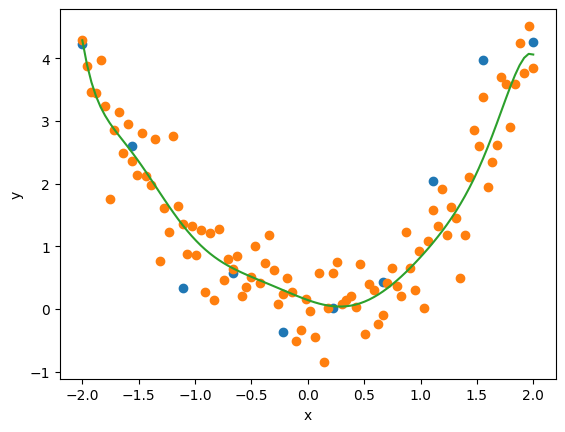

In [5]:
# Tạo bộ dữ liệu 100 điểm
x_new = np.linspace(-2, 2, 100)
y_new = x_new**2 + np.random.normal(0, 0.5, 100)

# Fit dữ liệu
X_new = poly.fit_transform(x_new.reshape(-1, 1))
y_pred_new = LinearRegression().fit(X_new, y_new).predict(X_new)

# Vẽ đồ thị
plt.plot(x, y, 'o')
plt.plot(x_new, y_new, 'o')
plt.plot(x_new, y_pred_new, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# Tính MSE
MSE = np.mean((y_new - y_pred_new)**2)
print("MSE sau khi thêm 100 điểm dữ liệu:", MSE)

MSE sau khi thêm 100 điểm dữ liệu: 0.21236369723774792


Trong trường hợp này, nhiều dữ liệu hơn dẫn đến MSE cao hơn là do dữ liệu thêm vào là nhiễu.
Nhịễu là các giá trị không thể giải thích được bởi hàm y = x^2. Khi thêm nhiễu vào dữ liệu, mô hình sẽ học được mối quan hệ giữa dữ liệu và nhiễu. Điều này dẫn đến việc mô hình dự đoán sai các giá trị thực tế, khiến MSE tăng lên.

## EX2

In [13]:
def conv2d(X, W, stride=1, padding=0):
    """
    2D Convolution operation.

    Args:
    X (numpy.ndarray): Input image (2D array).
    W (numpy.ndarray): Convolution kernel (2D array).
    stride (int): Stride for the convolution operation.
    padding (int): Padding to be added to the input image.

    Returns:
    numpy.ndarray: Output feature map after convolution.
    """

    # Get the dimensions of the input and kernel
    input_height, input_width = X.shape
    kernel_height, kernel_width = W.shape

    # Calculate the dimensions of the output feature map
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1

    # Create an empty output feature map
    Y = np.zeros((output_height, output_width))

    # Apply padding to the input image
    if padding > 0:
        X = np.pad(X, pad_width=padding, mode='constant')

    # Perform the convolution
    for i in range(0, output_height * stride, stride):
        for j in range(0, output_width * stride, stride):
            Y[i // stride, j // stride] = np.sum(X[i:i+kernel_height, j:j+kernel_width] * W)

    return Y

In [14]:
# Example usage:
input_image = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

kernel = np.array([[1, 0],
                   [0, -1]])

stride = 1
padding = 0

output_feature_map = conv2d(input_image, kernel, stride, padding)
print(output_feature_map)

[[-4. -4.]
 [-4. -4.]]


In [17]:
import torch
import torch.nn.functional as F

def conv2d(X, W, stride=1, padding=0):
    Y = F.conv2d(X, W, stride=stride, padding=padding)

    return Y

# Example usage:
input_image = torch.tensor([[[[1, 2, 3],
                              [4, 5, 6],
                              [7, 8, 9]]]], dtype=torch.float32)  # Batch size of 1, 1 channel, 3x3 image

kernel = torch.tensor([[[[1, 0],
                         [0, -1]]]], dtype=torch.float32)  # 1 output channel, 1 input channel, 2x2 kernel

stride = 1
padding = 0

# Apply the convolution operation
output_feature_map = conv2d(input_image, kernel, stride, padding)
print(output_feature_map)


tensor([[[[-4., -4.],
          [-4., -4.]]]])


## EX3

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [19]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Step 2: Load and preprocess the CIFAR-10 dataset
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(32, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:05<00:00, 29432981.93it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define the VGG-like model with 2 convolutional layers
class VGG2(nn.Module):
    def __init__(self):
        super(VGG2, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 8 * 8, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 10)  # 10 classes for CIFAR-10
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

# Load CIFAR-10 data and apply transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model and optimizer
model = VGG16()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Training loop (you can adjust the number of epochs)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Files already downloaded and verified
Files already downloaded and verified


RuntimeError: ignored

## EX4

Khi xây dựng mạng nơ-ron sâu (deep neural network), thường thấy rằng càng đi sâu vào mạng (các lớp phía sau), kích thước chiều rộng và chiều cao của dữ liệu thường giảm, trong khi độ sâu (số lớp) tăng lên. Hiện tượng này có một số nguyên nhân:

1. Pooling Layers: Trong mạng nơ-ron tích chập (CNN), các lớp pooling thường được sử dụng để giảm kích thước của đặc trưng. Pooling là quá trình tổng hợp thông tin từ các vùng nhỏ của đặc trưng, giúp giảm số lượng tham số và tính toán trong mạng. Việc này dẫn đến giảm kích thước width và height của đặc trưng.

2. Strided Convolution: Trong quá trình tích chập, nếu sử dụng bước tiến của một filter lớn hơn 1 (strided convolution), đặc trưng đầu ra sẽ có kích thước nhỏ hơn so với đặc trưng đầu vào. Điều này giúp giảm kích thước của đặc trưng trong mạng.

3. Downsampling: Trong mạng transfer learning, thông thường sẽ sử dụng pre-trained network và loại bỏ một số lớp phía sau để thu nhỏ kích thước mạng. Điều này giúp giảm kích thước và tính toán, nhưng vẫn giữ lại các đặc trưng quan trọng đã được học từ dữ liệu lớn.

4. Abstraction Levels: Mạng nơ-ron sâu thường tự động học các đặc trưng ở nhiều mức độ trừu tượng khác nhau. Các lớp phía sau thường chuyên về việc học các đặc trưng cao cấp, trừu tượng hơn, trong khi các lớp đầu tiên tập trung vào việc trích xuất các đặc trưng cơ bản. Điều này dẫn đến việc tạo ra các lớp phức tạp hơn (độ sâu tăng lên) để biểu diễn các khía cạnh phức tạp của dữ liệu.